# 과제: MNIST 데이터를 나만의 NN model로 95 % 이상의 성능으로 training 시켜보자!


## Loading MNIST training data

출처: 18기 DS 김승하님

In [5]:
import tensorflow as tf
from tensorflow import keras

# import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Loading the data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Scaling(image data는 min-max scaling 주로 사용)
x_train = x_train/255.0
x_test = x_test/255.0

## Training Data
28 * 28 pixel 값을 가진 총 60000개의 이미지 데이터

In [2]:
x_train.shape 

(60000, 28, 28)

Neural network 모델에 맞게 이미지 데이터를 벡터 형태로 데이터를 reshape 합니다.  
(Model을 만들 때 *keras.layers.Flatten(input_shape=(28, 28)) 이용해도 됨)

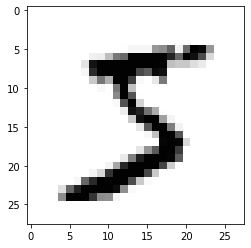

In [7]:
# Hint: x_train[0].reshape()
plt.imshow(x_train[0]).set_cmap('Greys')

In [8]:
x_train, x_test = x_train.reshape((-1, 28*28)), x_test.reshape((-1, 28*28))
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

## Training Labels
이미지 데이터가 나타내는 숫자값을 label로 가지고 있고, 0부터 9까지의 값을 나타냄  
마찬가지로, 60000개의 label이 존재

In [9]:
y_train.shape

(60000,)

In [10]:
# show MNIST label for above data
y_train[0]

5

## 나만의 모델을 tensorflow keras API 를 이용해 만들어 봅시다~

* parameters for model

In [11]:
activation_list = ["sigmoid", "relu", "softmax", "tanh"]

loss_list = ["sparse_categorical_crossentropy",
             "categorical_crossentropy", 
             "binary_crossentropy"]

optimizer_list = ["sgd", "adam", "rmsprop", "adagrad"]

initializer_list = [tf.keras.initializers.RandomNormal(), 
                    tf.keras.initializers.RandomUniform(), 
                    tf.keras.initializers.he_normal(), 
                    tf.keras.initializers.he_uniform(), 
                    tf.keras.initializers.GlorotUniform(),
                    tf.keras.initializers.GlorotNormal()]

# dropout
dropout_rate = 0.3
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, input_dim=784, activation = "sigmoid"),
    tf.keras.layers.Dense(2, activation = "sigmoid"),
    tf.keras.layers.Dropout(dropout_rate)
])


# regularizer
regularizer = tf.keras.regularizers.l1(1e-3)
regularizer = tf.keras.regularizers.l2(1e-3)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, input_dim=784, activation="sigmoid",
                          activity_regularizer=regularizer)
])

# weight initialization
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, input_dim=784, activation="sigmoid",
                          kernel_initializer=initializer_list[0])
])

#### My Own Model 

In [34]:
#### 자유롭게 Model을 만들고 compile 해봅시다 ####
model = tf.keras.Sequential()

model = keras.models.Sequential([
    keras.layers.Dense(200, input_dim=784, activation="relu",
                       kernel_initializer="he_normal",
                       kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dense(100, activation="relu",
                       kernel_initializer="he_normal",
                       kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(50, activation="relu",
                       kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dense(10, activation="softmax")
])

In [35]:
model.compile(optimizer = keras.optimizers.Adam(learning_rate=1e-3),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [36]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 200)               157000    
                                                                 
 dense_20 (Dense)            (None, 100)               20100     
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 dense_21 (Dense)            (None, 50)                5050      
                                                                 
 dense_22 (Dense)            (None, 10)                510       
                                                                 
Total params: 182,660
Trainable params: 182,660
Non-trainable params: 0
_________________________________________________________________


model을 자유롭게 train 해봅시다.  

In [37]:
model.fit(x_train, y_train, epochs=50, validation_split=0.2)

Epoch 1/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.6633 - accuracy: 0.8980 - val_loss: 0.3810 - val_accuracy: 0.9582
Epoch 2/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3690 - accuracy: 0.9514 - val_loss: 0.2963 - val_accuracy: 0.9642
Epoch 3/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3024 - accuracy: 0.9589 - val_loss: 0.2828 - val_accuracy: 0.9590
Epoch 4/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2709 - accuracy: 0.9630 - val_loss: 0.2403 - val_accuracy: 0.9693
Epoch 5/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2505 - accuracy: 0.9655 - val_loss: 0.2314 - val_accuracy: 0.9680
Epoch 6/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2384 - accuracy: 0.9675 - val_loss: 0.2363 - val_accuracy: 0.9667
Epoch 7/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2274 - accuracy: 0.9686 - val_loss: 0.2268 - val_accuracy:

95%이상의 성능을 가진 모델을 만들면 완성!

In [38]:
test_loss, test_acc = model.evaluate(x_test,y_test, verbose=2)

print('\nAccuracy:', test_acc)

313/313 - 1s - loss: 0.1822 - accuracy: 0.9703 - 744ms/epoch - 2ms/step

Accuracy: 0.970300018787384


![](https://www.tensorflow.org/versions/master/images/mnist_tensorboard.png)